In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('Unemployment in India.csv')
df2=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


#dataset1

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


### Data Cleaning
       1.check missing values if exists handle them
       2.normalize columns


  1.check missing values if exists handle them

In [6]:
df1.isna().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
for col in df1.columns:
    if(df1[col].dtype=='object'):
       df1[col].fillna(df1[col].mode()[0],inplace=True)
    else:
        df1[col].fillna(df1[col].mean(),inplace=True)

In [8]:
df1.isna().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0



   2.normalize columns

In [9]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')


In [10]:
df1.columns

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')

###Exploratory Data Analysis
       1.check null values
       2.check duplicate values
       3.check outliers
      

   1.check null values

In [11]:
df1.isnull().sum()

,0
region,0
date,0
frequency,0
estimated_unemployment_rate_(%),0
estimated_employed,0
estimated_labour_participation_rate_(%),0
area,0


   2.check duplicate values

In [12]:
df1.duplicated().sum()

np.int64(27)

In [13]:
df1.drop_duplicates(inplace=True)

In [14]:
df1.duplicated().sum()

np.int64(0)

In [15]:
df1.columns

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')

3.check outliers

In [16]:
for col in df1.columns:
    if(df1[col].dtype=='numeric'):
      sns.boxplot(df1[col])
      plt.xlabel(col)
      plt.show()

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_unemployment_rate_(%),741.0,1.178795e+01,1.071405e+01,0.00,4.66,8.37,15.88,76.74
estimated_employed,741.0,7.204460e+06,8.082522e+06,49420.00,1192616.00,4745178.00,11265828.00,45777509.00
estimated_labour_participation_rate_(%),741.0,4.263012e+01,8.105612e+00,13.33,38.07,41.18,45.49,72.57


###visualization of unemployement rate

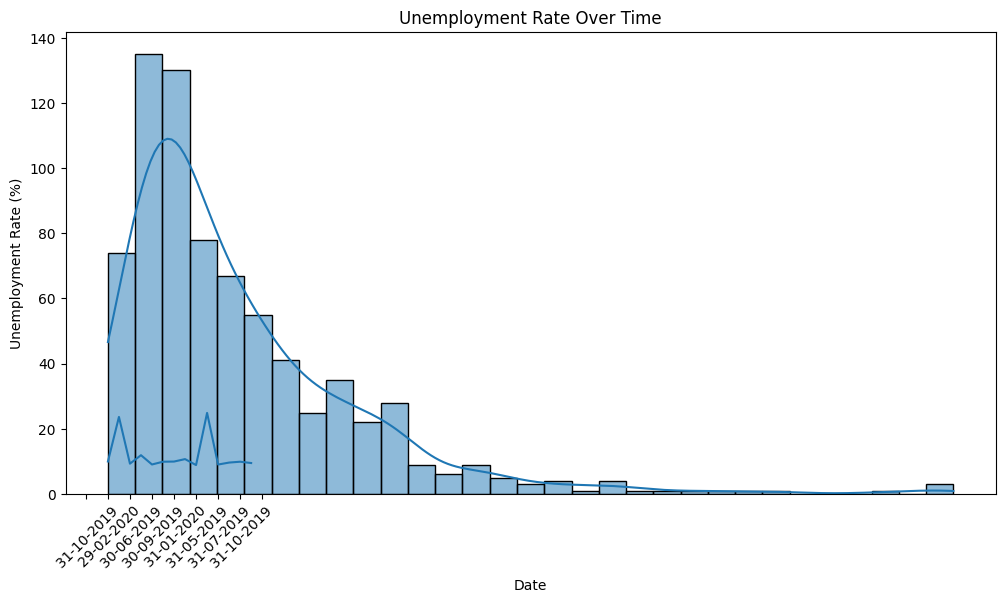

In [18]:
df1.groupby('date')['estimated_unemployment_rate_(%)'].mean().plot(figsize=(12,6))
sns.histplot(df1['estimated_unemployment_rate_(%)'],kde=True)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.show()

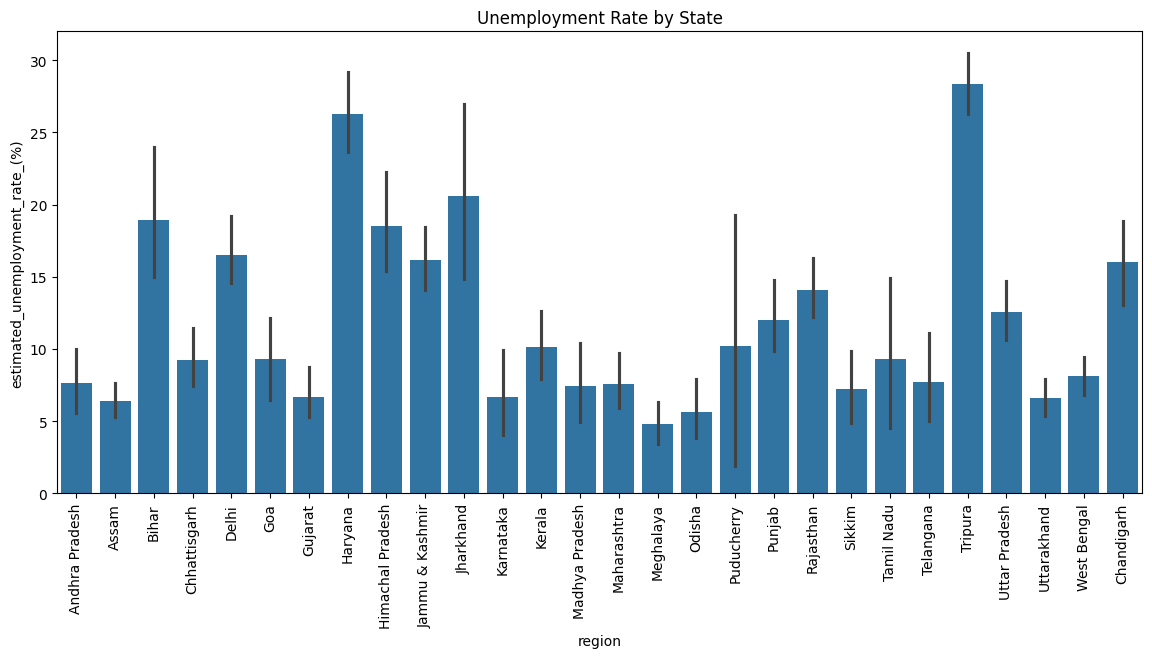

In [19]:
plt.figure(figsize=(14,6))
sns.barplot(x='region', y='estimated_unemployment_rate_(%)', data=df1)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()

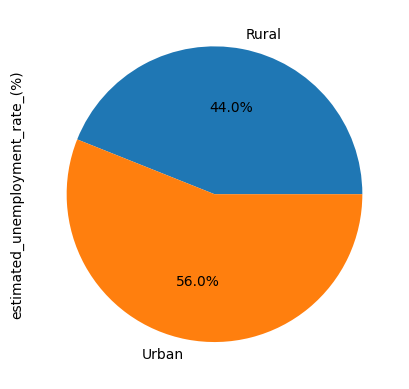

In [20]:
df1.groupby('area')['estimated_unemployment_rate_(%)'].mean().plot.pie(autopct='%1.1f%%')
plt.show()

4.label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

label encoding

In [23]:
for col in df1.columns:
    if(df1[col].dtype=='object'):
       df1[col]=le.fit_transform(df1[col])

In [24]:
df1

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area
0,0,8,0,3.65,11999139.0,43.24,0
1,0,2,0,3.05,11755881.0,42.05,0
2,0,10,0,3.75,12086707.0,43.50,0
3,0,11,0,3.32,12285693.0,43.97,0
4,0,4,0,5.17,12256762.0,44.68,0
...,...,...,...,...,...,...,...
749,27,0,1,7.55,10871168.0,44.09,1
750,27,7,1,6.67,10806105.0,43.34,1
751,27,1,1,15.63,9299466.0,41.20,1
752,27,9,1,15.22,9240903.0,40.67,1


#model

In [25]:
x = df1[['estimated_employed','estimated_unemployment_rate_(%)']]
y = df1['estimated_unemployment_rate_(%)']


In [26]:

x.shape,y.shape

((741, 2), (741,))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [29]:
x_train.shape,x_test.shape

((592, 2), (149, 2))

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(x_train, y_train)

LinearRegression()

In [33]:
y_pred=model.predict(x_test)

In [34]:
from sklearn.metrics import r2_score

In [35]:
accuracy=r2_score(y_test,y_pred)*100

In [36]:
accuracy

100.0

#dataset2

In [37]:
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   region                                   741 non-null    int64  
 1   date                                     741 non-null    int64  
 2   frequency                                741 non-null    int64  
 3   estimated_unemployment_rate_(%)          741 non-null    float64
 4   estimated_employed                       741 non-null    float64
 5   estimated_labour_participation_rate_(%)  741 non-null    float64
 6   area                                     741 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 46.3 KB


#Data Cleaning
      1.check missing values if exists handle them
       2.normalize columns

     1.check missing values if exists handle them

In [39]:
df2.isna().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


  2.normalize columns

In [40]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')


In [41]:
df2.columns

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'region.1', 'longitude', 'latitude'],
      dtype='object')

##Exploratory Data Analysis
       1.check null values
       2.check duplicate values
       3.check outliers
      

   1.check null values

In [42]:
df2.isnull().sum()

,0
region,0
date,0
frequency,0
estimated_unemployment_rate_(%),0
estimated_employed,0
estimated_labour_participation_rate_(%),0
region.1,0
longitude,0
latitude,0


  2.check duplicate values

In [43]:
df2.duplicated().sum()

np.int64(0)

In [44]:
df2.columns

Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'region.1', 'longitude', 'latitude'],
      dtype='object')

3.check outliers

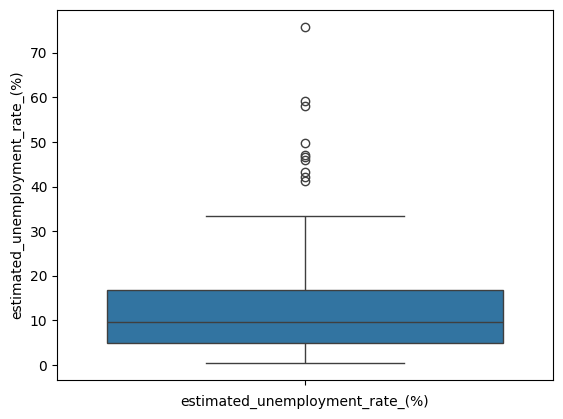

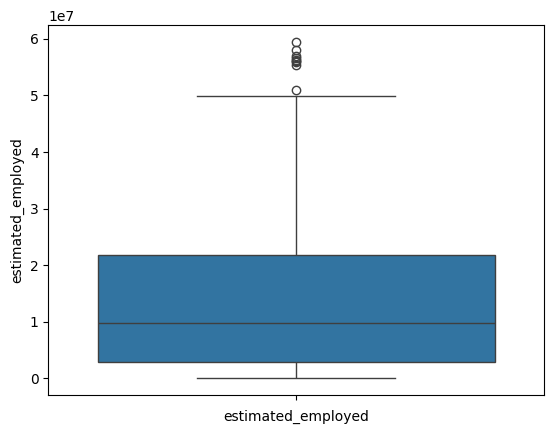

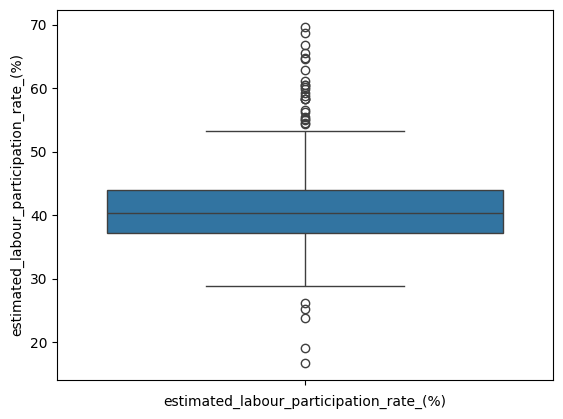

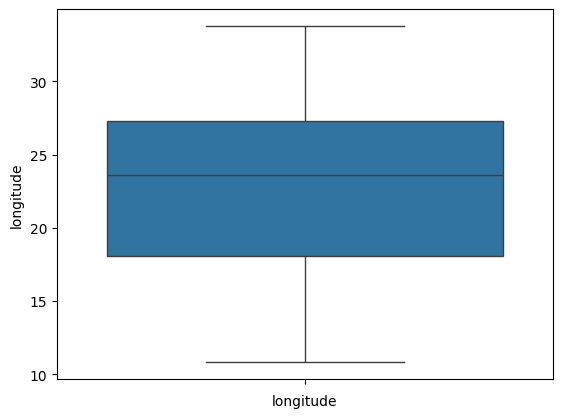

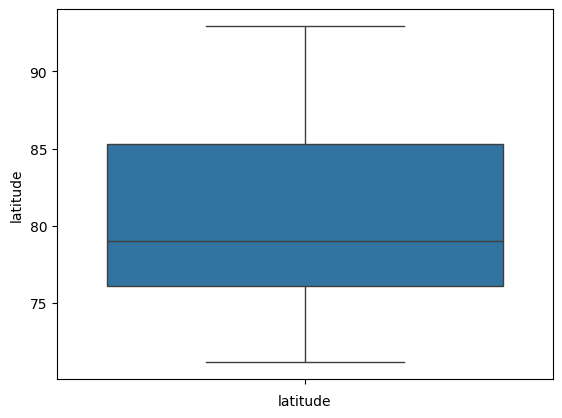

In [45]:
for col in df2.columns:
    if(df2[col].dtype!='object'):
      sns.boxplot(df2[col])
      plt.xlabel(col)
      plt.show()

In [46]:
out_list=['estimated_unemployment_rate_(%)','estimated_employed', 'estimated_labour_participation_rate_(%)']
for col in out_list:
    Q1=df2[col].quantile(0.25)
    Q2=df2[col].quantile(0.50)
    Q3=df2[col].quantile(0.75)
    IQR=Q3-Q1
    LB=Q1-(1.5*IQR)
    UB=Q3+(1.5*IQR)
    df2 = df2[(df2[col]>=LB) & (df2[col]<=UB)]

In [47]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_unemployment_rate_(%),223.0,1.064480e+01,7.047481e+00,0.5000,4.935000e+00,9.650000e+00,1.548500e+01,3.350000e+01
estimated_employed,223.0,1.373551e+07,1.142313e+07,193427.0000,3.441488e+06,1.008827e+07,2.269975e+07,5.091506e+07
estimated_labour_participation_rate_(%),223.0,4.062466e+01,4.844914e+00,28.9900,3.734500e+01,4.030000e+01,4.310500e+01,5.494000e+01
longitude,223.0,2.277041e+01,6.457880e+00,10.8505,1.811240e+01,2.298680e+01,2.753300e+01,3.377820e+01
latitude,223.0,7.977930e+01,5.536513e+00,71.1924,7.571390e+01,7.865690e+01,8.509850e+01,9.293760e+01


###visualization of unemployement rate

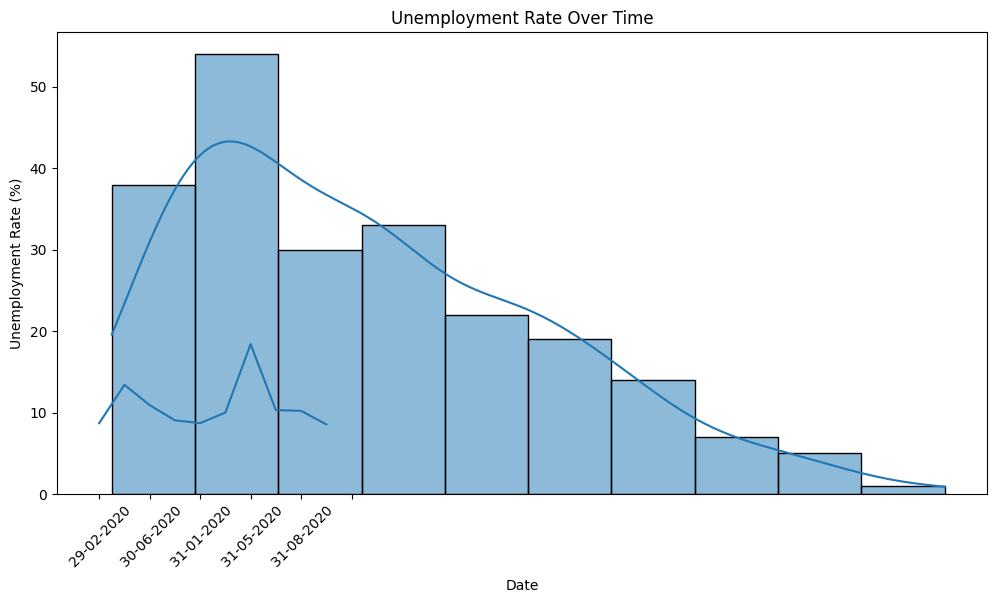

In [48]:
df2.groupby('date')['estimated_unemployment_rate_(%)'].mean().plot(figsize=(12,6))
sns.histplot(df2['estimated_unemployment_rate_(%)'],kde=True)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.show()

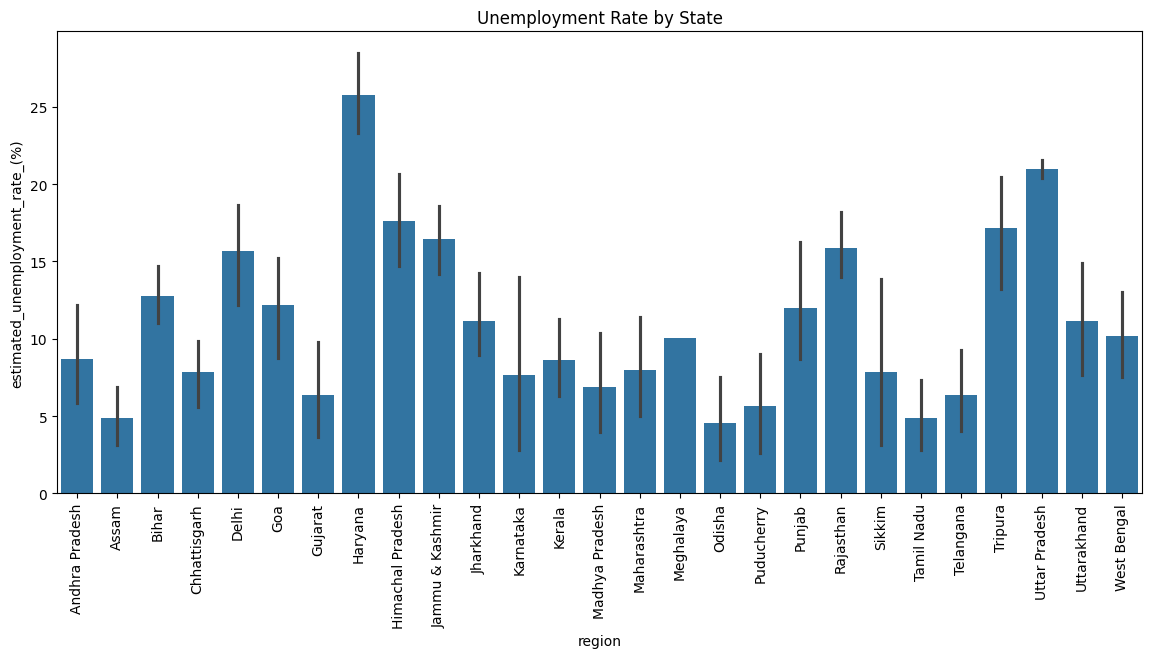

In [49]:
plt.figure(figsize=(14,6))
sns.barplot(x='region', y='estimated_unemployment_rate_(%)', data=df2)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()

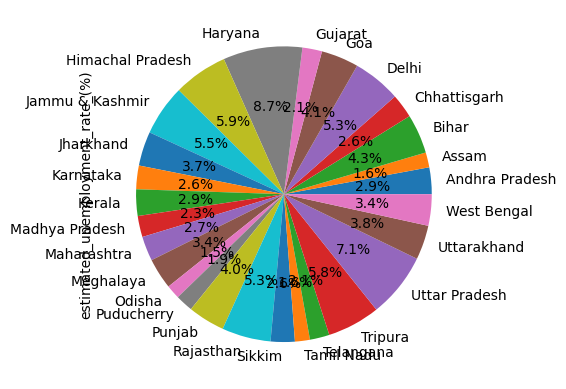

In [50]:
df2.groupby('region')['estimated_unemployment_rate_(%)'].mean().plot.pie(autopct='%1.1f%%')
plt.show()



4.label encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
for col in df2.columns:
    if(df2[col].dtype=='object'):
       df2[col]=le.fit_transform(df2[col])

In [54]:
df2

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),region.1,longitude,latitude
0,0,4,0,5.48,16635535,41.02,3,15.9129,79.740
1,0,0,0,5.83,16545652,40.90,3,15.9129,79.740
2,0,5,0,5.79,15881197,39.18,3,15.9129,79.740
3,0,1,0,20.51,11336911,33.10,3,15.9129,79.740
4,0,6,0,17.43,12988845,36.46,3,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,26,2,0,7.29,30726310,40.39,0,22.9868,87.855
263,26,7,0,6.83,35372506,46.17,0,22.9868,87.855
264,26,8,0,14.87,33298644,47.48,0,22.9868,87.855
265,26,3,0,9.35,35707239,47.73,0,22.9868,87.855


#model

In [55]:
x = df2[['estimated_employed','estimated_unemployment_rate_(%)']]
y = df2['estimated_unemployment_rate_(%)']


In [56]:
x.shape,y.shape

((223, 2), (223,))

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [59]:
x_train.shape,x_test.shape

((156, 2), (67, 2))

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model=LinearRegression()

In [62]:
model.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred=model.predict(x_test)

In [64]:
from sklearn.metrics import r2_score

In [65]:
accuracy=r2_score(y_test,y_pred)*100

In [66]:
accuracy

100.0